# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import  fetch_california_housing

In [3]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [4]:
#your code here
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
spaceship.shape

(8693, 14)

**Check for data types**

In [6]:
#your code here
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [7]:
#your code here
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [9]:
#your code here
spaceship_cleaned = spaceship.dropna()
spaceship_cleaned.shape

(6606, 14)

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [11]:
#your code here
spaceship_cleaned['Cabin'] = spaceship_cleaned['Cabin'].str[0]
spaceship_cleaned['Cabin'].value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_9124\3546616146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_cleaned['Cabin'] = spaceship_cleaned['Cabin'].str[0]


Cabin
F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: count, dtype: int64

- Drop PassengerId and Name

In [16]:
#your code here
spaceship_cleaned = spaceship_cleaned.drop(columns = ["PassengerId", "Name"])

- For non-numerical columns, do dummies.

In [24]:
spaceship_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6606 non-null   object 
 1   CryoSleep     6606 non-null   object 
 2   Cabin         6606 non-null   object 
 3   Destination   6606 non-null   object 
 4   Age           6606 non-null   float64
 5   VIP           6606 non-null   object 
 6   RoomService   6606 non-null   float64
 7   FoodCourt     6606 non-null   float64
 8   ShoppingMall  6606 non-null   float64
 9   Spa           6606 non-null   float64
 10  VRDeck        6606 non-null   float64
 11  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 625.8+ KB


In [25]:
#your code here
non_numerical_cols = spaceship_cleaned.select_dtypes(include=['object']).columns
spaceship_cleaned_with_dummies = pd.get_dummies(spaceship_cleaned, columns=non_numerical_cols, drop_first=True)

In [26]:
spaceship_cleaned_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        6606 non-null   float64
 1   RoomService                6606 non-null   float64
 2   FoodCourt                  6606 non-null   float64
 3   ShoppingMall               6606 non-null   float64
 4   Spa                        6606 non-null   float64
 5   VRDeck                     6606 non-null   float64
 6   Transported                6606 non-null   bool   
 7   HomePlanet_Europa          6606 non-null   bool   
 8   HomePlanet_Mars            6606 non-null   bool   
 9   CryoSleep_True             6606 non-null   bool   
 10  Cabin_B                    6606 non-null   bool   
 11  Cabin_C                    6606 non-null   bool   
 12  Cabin_D                    6606 non-null   bool   
 13  Cabin_E                    6606 non-null   bool   
 1

**Perform Train Test Split**

In [28]:
spaceship_cleaned_with_dummies.loc[:, 'Transported'] = spaceship_cleaned_with_dummies['Transported'].astype(int)
spaceship_cleaned_with_dummies.loc[:, 'HomePlanet_Europa'] = spaceship_cleaned_with_dummies['HomePlanet_Europa'].astype(int)
spaceship_cleaned_with_dummies.loc[:, 'HomePlanet_Mars'] = spaceship_cleaned_with_dummies['HomePlanet_Mars'].astype(int)
spaceship_cleaned_with_dummies.loc[:, 'CryoSleep_True'] = spaceship_cleaned_with_dummies['CryoSleep_True'].astype(int)
spaceship_cleaned_with_dummies.loc[:, 'Cabin_B'] = spaceship_cleaned_with_dummies['Cabin_B'].astype(int)
spaceship_cleaned_with_dummies.loc[:, 'Cabin_C'] = spaceship_cleaned_with_dummies['Cabin_C'].astype(int)
spaceship_cleaned_with_dummies.loc[:, 'Cabin_D'] = spaceship_cleaned_with_dummies['Cabin_D'].astype(int)
spaceship_cleaned_with_dummies.loc[:, 'Cabin_E'] = spaceship_cleaned_with_dummies['Cabin_E'].astype(int)
spaceship_cleaned_with_dummies.loc[:, 'Cabin_F'] = spaceship_cleaned_with_dummies['Cabin_F'].astype(int)
spaceship_cleaned_with_dummies.loc[:, 'Cabin_G'] = spaceship_cleaned_with_dummies['Cabin_G'].astype(int)
spaceship_cleaned_with_dummies.loc[:, 'Cabin_T'] = spaceship_cleaned_with_dummies['Cabin_T'].astype(int)
spaceship_cleaned_with_dummies.loc[:, 'Destination_PSO J318.5-22'] = spaceship_cleaned_with_dummies['Destination_PSO J318.5-22'].astype(int)
spaceship_cleaned_with_dummies.loc[:, 'Destination_TRAPPIST-1e'] = spaceship_cleaned_with_dummies['Destination_TRAPPIST-1e'].astype(int)
spaceship_cleaned_with_dummies.loc[:, 'VIP_True'] = spaceship_cleaned_with_dummies['VIP_True'].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_9124\3006013951.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  spaceship_cleaned_with_dummies.loc[:, 'Destination_PSO J318.5-22'] = spaceship_cleaned_with_dummies['Destination_PSO J318.5-22'].astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_9124\3006013951.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 0 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  spaceship_cleaned_with_dummies.loc[:, 'Destination_TRAPPIST-1e'] = spaceship_cleaned_with_dummies['Destination_TRAPPIST-1e'].astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_9124\3006013951.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and wil

In [29]:
#your code here
features = spaceship_cleaned_with_dummies.drop(columns = ["Transported"])
target = spaceship_cleaned_with_dummies["Transported"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [31]:
#your code here
normalizer = MinMaxScaler()

In [32]:
normalizer.fit(X_train)

MinMaxScaler()

In [33]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [34]:
X_train_norm

array([[4.05063291e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.06329114e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.79746835e-01, 0.00000000e+00, 7.91600979e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [4.55696203e-01, 0.00000000e+00, 1.59527723e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.30379747e-01, 0.00000000e+00, 1.34169658e-04, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.77215190e-01, 2.01612903e-04, 2.95508671e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [35]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0.405063,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.050633,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.379747,0.00000,0.007916,0.000000,0.051276,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.215190,0.00131,0.000000,0.046111,0.016378,0.000049,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.329114,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [36]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0.632911,0.0,0.000000,0.0,0.00000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.227848,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.189873,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.658228,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.784810,0.0,0.054775,0.0,0.07774,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [38]:
knn = KNeighborsRegressor(n_neighbors=10)

In [39]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=10)

- Evaluate your model's performance. Comment it

In [40]:
#your code here
knn.score(X_test_norm, y_test)


0.3662027231467473

Mejorando R cuadrado

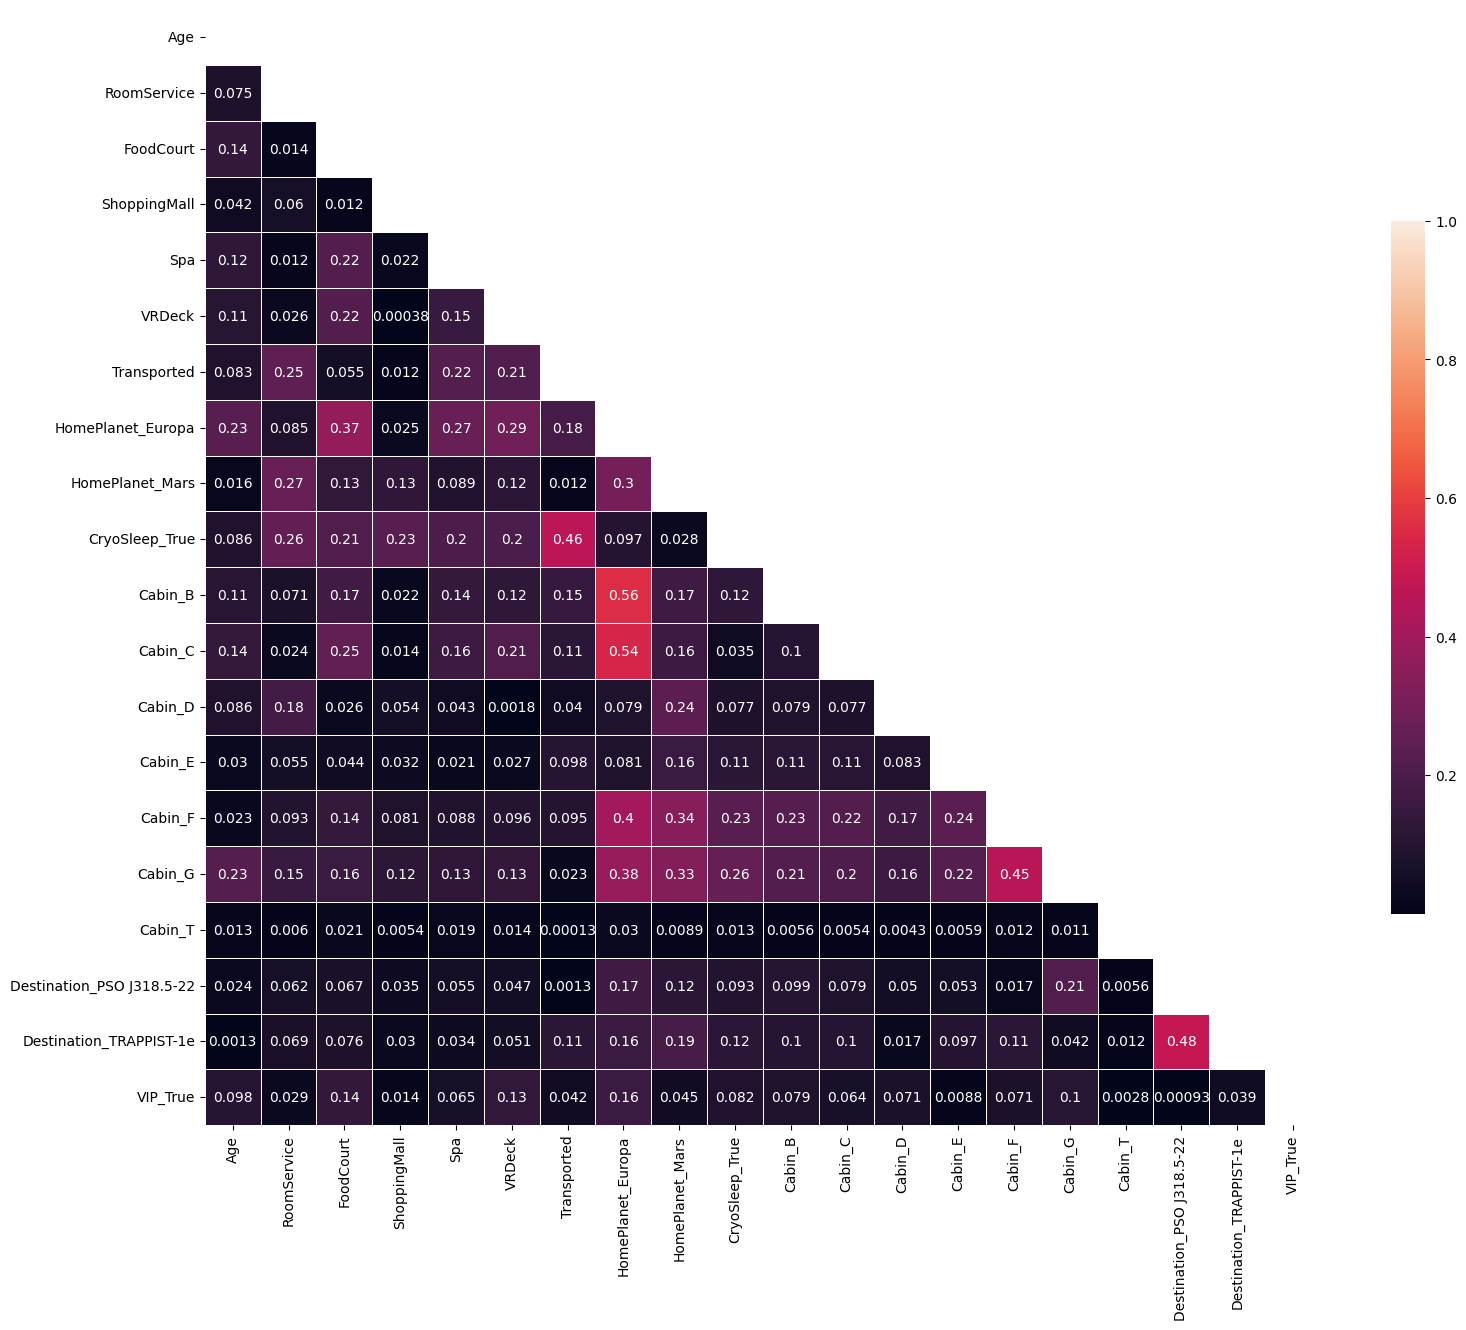

In [43]:
corr=np.abs(spaceship_cleaned_with_dummies.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [44]:
X_train_reduced = X_train_norm.drop(columns = ["Age", "FoodCourt", "ShoppingMall"])
X_test_reduced = X_test_norm.drop(columns = ["Age", "FoodCourt", "ShoppingMall"])

In [45]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_reduced, y_train)

knn.score(X_test_reduced, y_test)

0.37428139183055975